In [20]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, uniform, kstest, anderson_ksamp, cramervonmises
import pandas as pd
import seaborn as sns
from matplotlib.animation import FuncAnimation
from simulador import BrownianSimulator2D
from generador_grupo5 import MSWS
from pcg import PCG

# Ejercicio 1
Sobre el generador de números al azar elegido, se pide:
- [x] Implementarlo en función de la especificación del mismo.
- [x] Modificarlo (si aplica) para obtener números al azar entre 0 y 1
- [x] Realizar los gráficos que se consideren adecuados para mostrar las distribuciones de números pseudoaleatorios generados en ambos           casos (explicar que se busca interpretar con cada uno de los gráficos)

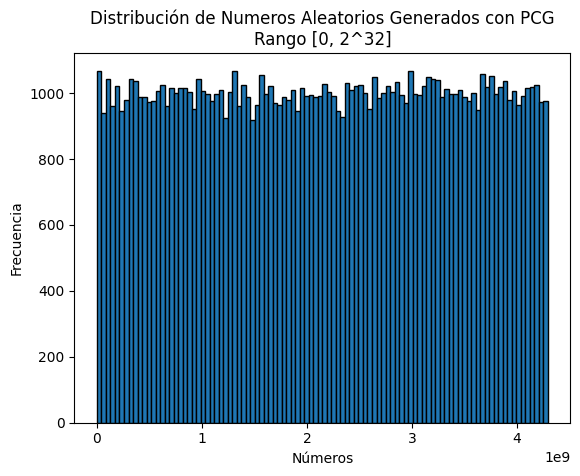

In [21]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 2^32]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_histogram()

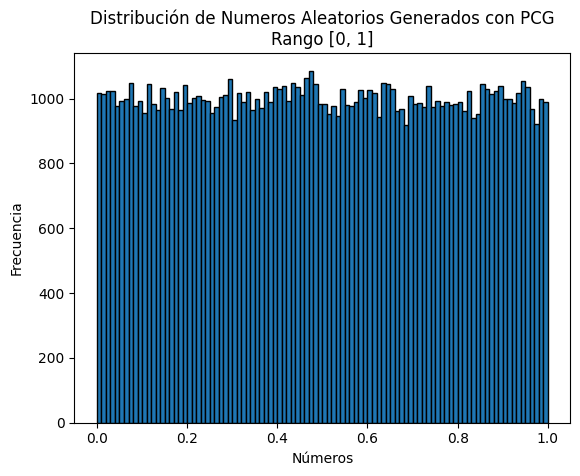

In [22]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_normalized_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 1]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_normalized_histogram()

# Ejercicio 2
En este ejercicio se busca aplicar distintos tests estadísticos vistos en la materia para evaluar tanto el
comportamiento del generador de números pseudoaleatorios elegido como el comportamiento de otro generador
implementado por otro grupo. El grupo al cual le deben evaluar el generador se encuentra en la planilla de grupos en Drive.
Para esta tarea se debe solicitar al equipo asignado uno o más lotes de números generados de los tamaños que se
necesiten. El equipo que haya generado los números debe incluir en la notebook entregada el código utilizado para
generar los mismos.

1. Sobre los generadores implementados en el ejercicio 1:
- [ ] Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- [ ] Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.
2. Sobre el generador implementado por el grupo asignado:
- [ ] Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- [ ] Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.
- [ ] Comparar los resultados obtenidos para este generados con los obtenidos en el punto a)

## Tests sobre el generador propio

### Test 1 - Chi<sup>2</sup>

Para evaluar si el comportamiento de nuestro generador corresponde a una distribución uniforme primero utilizamos el test $Chi^2$, que mide la dispersión entre los valores obtenidos y los valores esperados mediante el estadístico $D^2=\sum_{n=1}^{K-1}\dfrac{(N_i-np_i)^2}{np_i}$. Teniendo en cuenta que este test es aplicable a variables categóricas primero tendremos que discretizar las muestras generadas para poder aplicarlo.

Planteamos como hipótesis nula que la muestra generada sigue una distribución uniforme, y la rechazamos si el P valor obtenido es menor que el nivel de significación $\alpha$.

In [23]:
"""
    Test estadístico 01 para comprobar que el algoritmo sigue una distribución uniforme
    h0: La distribución de la muestra sigue una distribucion uniforme
    h1: La distribución de la muestra no sigue una distribucion uniforme

    - Si rechazamos la hipotesis nula diremos que encontramos suficiente evidencia para
      decir que la misma es falsa con una probabilidad alfa (significancia) de equivocarnos.
    - Si no rechazamos la hipótesis nula diremos que no encontramos suficiente evidencia
      en las muestras para rechazarla y no se puede concluir que la distribución no sea 
      uniforme con ese nivel de significancia.
"""
def chisquare_test(n_numbers, n_bins):
    seed = 1727567639 * 1_000
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(n_numbers)]
    
    min_val = 0
    max_val = 1
    bin_edges = n_bins + 1
    significance = 0.05
    bins = np.linspace(min_val, max_val, bin_edges)
    counts, _ = np.histogram(numbers, bins=bins)
    expected_counts = [len(numbers) / n_bins] * n_bins
    
    dsquare, p_value = chisquare(counts, f_exp=expected_counts)
    p_value = round(p_value, 2)
    dsquare = round(dsquare, 2)
    
    print(f"P valor: {p_value:.2f}")
    print(f"D cuadrado: {dsquare:.2f}")
    print()
    
    if p_value >= significance:
        print("[*] No hay suficiente evidencia para rechazar la hipótesis nula")
        print(f"[*] P valor = {p_value:.2f} > alfa = {significance:.2f}")
    else:
        print("[*] Se rechaza la hipotesis nula")
        print(f"[*] P valor = {p_value:.2f} < alfa = {significance:.2f}")

def print_result(title, callback):
    border = '*' * 100
    print(border)
    print(title)
    print(border)
    callback()
    print(border)    

def run_chisquare_tests():
    n_numbers_01 = 100_000
    n_bins_01 = 100
    description_01 = f"Test chi cuadrado 01: numero de muestras = {n_numbers_01}, numero de divisiones = {n_bins_01}"
    print_result(description_01, lambda: chisquare_test(n_numbers_01, n_bins_01))
    print()
    
    n_numbers_02 = 10_000
    n_bins_02 = 100
    description_02 = f"Test chi cuadrado 02: numero de muestras = {n_numbers_02}, numero de divisiones = {n_bins_02}"
    print_result(description_02, lambda: chisquare_test(n_numbers_02, n_bins_02))
    print()
    
    n_numbers_03 = 1_000
    n_bins_03 = 100
    description_03 = f"Test chi cuadrado 03: numero de muestras = {n_numbers_03}, numero de divisiones = {n_bins_03}"
    print_result(description_03, lambda: chisquare_test(n_numbers_03, n_bins_03))
    print()
    
    n_numbers_04 = 100
    n_bins_04 = 10
    description_04 = f"Test chi cuadrado 04: numero de muestras = {n_numbers_04}, numero de divisiones = {n_bins_04}"
    print_result(description_04, lambda: chisquare_test(n_numbers_04, n_bins_04))
    print()
    
    n_numbers_05 = 10
    n_bins_05 = 2
    description_05 = f"Test chi cuadrado 05: numero de muestras = {n_numbers_05}, numero de divisiones = {n_bins_05}"
    print_result(description_05, lambda: chisquare_test(n_numbers_05, n_bins_05))
    print()

run_chisquare_tests()

****************************************************************************************************
Test chi cuadrado 01: numero de muestras = 100000, numero de divisiones = 100
****************************************************************************************************
P valor: 0.90
D cuadrado: 81.39

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.90 > alfa = 0.05
****************************************************************************************************

****************************************************************************************************
Test chi cuadrado 02: numero de muestras = 10000, numero de divisiones = 100
****************************************************************************************************
P valor: 0.27
D cuadrado: 106.96

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.27 > alfa = 0.05
******************************************************************************

Realizamos el test $Chi^2$ con nivel de significación $\alpha=0.05$ sobre 5 muestras de tamaños $10$, $100$, $1\,000$, $10\,000$, y $100\,000$ y observamos que en todos los casos el P valor obtenido es mayor que $\alpha$, por lo que se acepta la hipótesis nula para todas las muestras.

### Test 2 - Kolmogorov

Ahora evaluaremos nuestro generador aplicando el test de Kolmogorov-Smirnov, que utiliza como estadístico la máxima distancia entre la distribución teórica y la distribución empírica generada a partir de una muestra.  

In [24]:
"""
    Test estadístico 02 para comprobar que el algoritmo sigue una distribución uniforme
    h0: La distribución de la muestra sigue una distribucion uniforme
    h1: La distribución de la muestra no sigue una distribucion uniforme

    - Si rechazamos la hipotesis nula diremos que encontramos suficiente evidencia para
      decir que la misma es falsa con una probabilidad alfa (significancia) de equivocarnos.
    - Si no rechazamos la hipótesis nula diremos que no encontramos suficiente evidencia
      en las muestras para rechazarla y no se puede concluir que la distribución no sea 
      uniforme con ese nivel de significancia.
"""
def kolmogorov_test(data):
    # Realizar el test de Kolmogorov-Smirnov
    # Comparamos la muestra con una distribución uniforme
    ks_stat, p_val = kstest(data, 'uniform')

    print('─' * 10)
    print(f'Tamaño de la muestra: {len(data):_}')
    print(f'Estadístico KS: {ks_stat:.4f}')
    print(f'P valor: {p_val:.4f}')

    # Interpretar el resultado
    alpha = 0.05
    if p_val < alpha:
        print("[*] Rechazamos la hipótesis nula: la muestra no sigue una distribución uniforme.")
        print(f"[*] P valor = {p_val:.2f} < alfa = {alpha:.2f}")
    else:
        print("[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.")
        print(f"[*] P valor = {p_val:.2f} > alfa = {alpha:.2f}")

In [25]:
"""
    Graficamos la distribución acumulativa teórica vs la empírica

    (El argumento ax es opcional por si se está haciendo un subplot)
"""
def plot_cdf(data, ax = None):
    if not ax:
        ax = plt.gca()
    
    df = pd.DataFrame({'data': data})

    # Calcular la función de distribución acumulativa teórica
    # Para una distribución uniforme
    x = np.linspace(0, 1, len(data))
    cdf_theoretical = uniform.cdf(x, loc=0, scale=1)

    # Graficar la función de distribución empírica
    sns.ecdfplot(df['data'], label='Empirical CDF', color='blue', ax=ax)

    # Graficar la función de distribución acumulativa teórica
    ax.plot(x, cdf_theoretical, label='Theoretical CDF', color='red', linestyle='--')

    # Añadir detalles al gráfico
    ax.set_title(f"Empírica vs Teórica (n={len(data):_})")
    ax.set_xlabel('Valor')
    ax.set_ylabel('Probabilidad Acumulada')
    ax.legend()

In [26]:
# Generamos muestras con nuestro algoritmo
seed = 1727567637 * 1_000
pcga = PCG(seed)

small_sample = [pcga.random_normalized() for _ in range(100)]
medium_sample = [pcga.random_normalized() for _ in range(1_000)]
large_sample = [pcga.random_normalized() for _ in range(10_000)]
very_large_sample = [pcga.random_normalized() for _ in range(100_000)]

In [27]:
# Test de Kolmogorov
kolmogorov_test(small_sample)
kolmogorov_test(medium_sample)
kolmogorov_test(large_sample)
kolmogorov_test(very_large_sample)

──────────
Tamaño de la muestra: 100
Estadístico KS: 0.0728
P valor: 0.6374
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.64 > alfa = 0.05
──────────
Tamaño de la muestra: 1_000
Estadístico KS: 0.0288
P valor: 0.3710
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.37 > alfa = 0.05
──────────
Tamaño de la muestra: 10_000
Estadístico KS: 0.0079
P valor: 0.5528
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.55 > alfa = 0.05
──────────
Tamaño de la muestra: 100_000
Estadístico KS: 0.0015
P valor: 0.9740
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.97 > alfa = 0.05


Evaluamos con 4 muestras de tamaños $10$, $1\,000$, $10\,000$, y $100\,000$ y un nivel de significación $\alpha=0.05$ y observamos nuevamente que el P valor es mayor que $\alpha$, por lo que no hay hay suficiente evidencia para rechazar la hipótesis nula de que la muestra sigue una distribución uniforme.

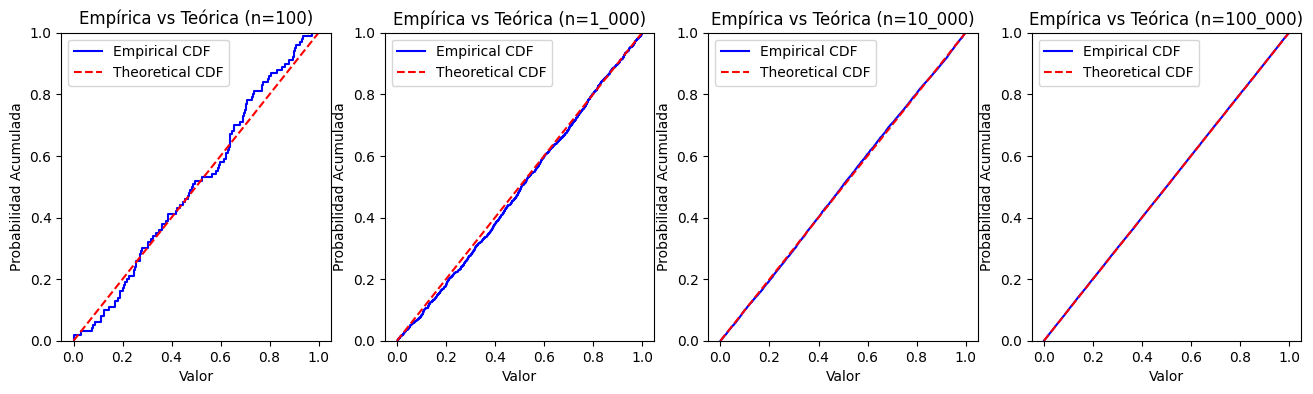

In [28]:
fig, axis = plt.subplots(1, 4, figsize=(16, 4), squeeze=False)

plot_cdf(small_sample, axis[0][0])
plot_cdf(medium_sample, axis[0][1])
plot_cdf(large_sample, axis[0][2])
plot_cdf(very_large_sample, axis[0][3])

# Mostrar el gráfico
plt.show() 

Para cada muestra graficamos la distribución empírica y la distribución teórica, y vemos que para la muestra de tamaño $n=100$ se desvía ligeramente de la distribución empírica de la teórica, pero a medida que aumenta el número de observaciones la diferencia se reduce.

### Test 3 - Cramer Von Mises

Usamos ahora el test de Cramer Von Mises para evaluar nuestro generador.

El estadístico es $T=\dfrac{1}{12n} + \sum_{i=1}^{n}[\dfrac{2i-1}{2n}-F(x_i)]^2$, siendo $F$ la distribución teórica, y rechazamos la hipótesis nula si el valor del estadístico es mayor al valor tabulado, que se obtiene a partir del número de observaciones y el nivel de significación $\alpha$.

In [29]:
def cramervonmises_test(sample):
    resultado = cramervonmises(sample, 'uniform')

    print('─' * 10)
    print(f"Tamaño de la muestra: {len(sample):_}")
    print('Estadístico: %.3f' % resultado.statistic)
    print('P valor: %.3f' % resultado.pvalue)
    
    significance_levels = [0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.001]

    for i in range(len(significance_levels)):
        if resultado.pvalue > significance_levels[i]:
            print('%.3f: %.3f, Datos uniformes (No se puede rechazar H0)' % (resultado.pvalue, significance_levels[i]))
        else:
            print('%.3f: %.3f, Datos no uniformes (Se rechaza H0)' % (resultado.pvalue, significance_levels[i]))

In [30]:
# Generamos muestras con nuestro algoritmo
seed = 1727567637 * 1_000
pcga = PCG(seed)

small_sample = [pcga.random_normalized() for _ in range(100)]
medium_sample = [pcga.random_normalized() for _ in range(1_000)]
large_sample = [pcga.random_normalized() for _ in range(10_000)]
very_large_sample = [pcga.random_normalized() for _ in range(100_000)]

cramervonmises_test(small_sample)
cramervonmises_test(medium_sample)
cramervonmises_test(large_sample)
cramervonmises_test(very_large_sample)

──────────
Tamaño de la muestra: 100
Estadístico: 0.108
P valor: 0.549
0.549: 0.250, Datos uniformes (No se puede rechazar H0)
0.549: 0.100, Datos uniformes (No se puede rechazar H0)
0.549: 0.050, Datos uniformes (No se puede rechazar H0)
0.549: 0.025, Datos uniformes (No se puede rechazar H0)
0.549: 0.010, Datos uniformes (No se puede rechazar H0)
0.549: 0.005, Datos uniformes (No se puede rechazar H0)
0.549: 0.001, Datos uniformes (No se puede rechazar H0)
──────────
Tamaño de la muestra: 1_000
Estadístico: 0.195
P valor: 0.278
0.278: 0.250, Datos uniformes (No se puede rechazar H0)
0.278: 0.100, Datos uniformes (No se puede rechazar H0)
0.278: 0.050, Datos uniformes (No se puede rechazar H0)
0.278: 0.025, Datos uniformes (No se puede rechazar H0)
0.278: 0.010, Datos uniformes (No se puede rechazar H0)
0.278: 0.005, Datos uniformes (No se puede rechazar H0)
0.278: 0.001, Datos uniformes (No se puede rechazar H0)
──────────
Tamaño de la muestra: 10_000
Estadístico: 0.122
P valor: 0.48

Realizamos el test con 4 muestras de tamaños $10$, $1\,000$, $10\,000$, y $100\,000$ con los niveles de significación $0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.001$ y observamos que en todos los casos el P valor es mayor que $\alpha$ por lo que no se rechaza la hipótesis nula.

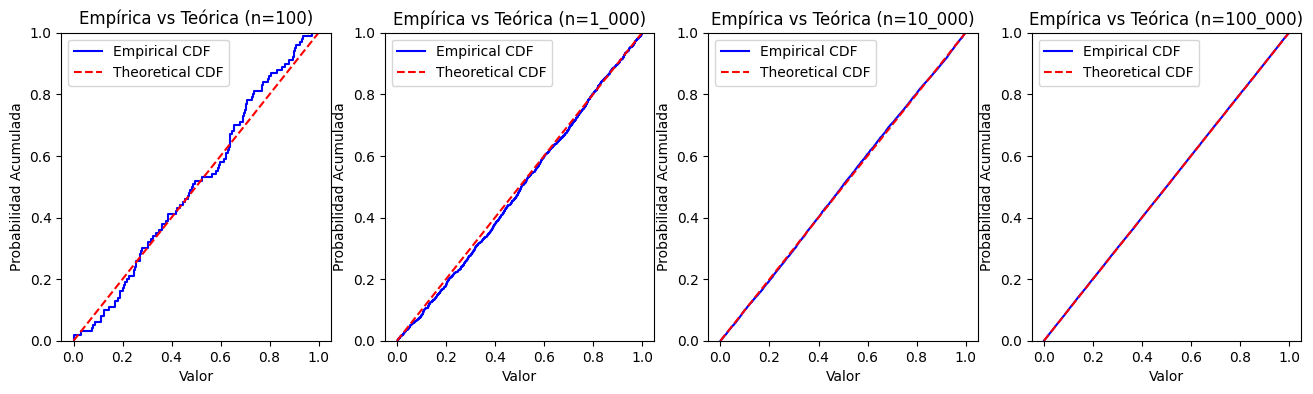

In [31]:
fig, axis = plt.subplots(1, 4, figsize=(16, 4), squeeze=False)

plot_cdf(small_sample, axis[0][0])
plot_cdf(medium_sample, axis[0][1])
plot_cdf(large_sample, axis[0][2])
plot_cdf(very_large_sample, axis[0][3])

# Mostrar el gráfico
plt.show() 

## Tests sobre el generador del grupo 5

### Test 1 - Chi<sup>2</sup>

In [32]:
"""
    Test estadístico 01 para comprobar que el algoritmo sigue una distribución uniforme
    h0: La distribución de la muestra sigue una distribucion uniforme
    h1: La distribución de la muestra no sigue una distribucion uniforme

    - Si rechazamos la hipotesis nula diremos que encontramos suficiente evidencia para
      decir que la misma es falsa con una probabilidad alfa (significancia) de equivocarnos.
    - Si no rechazamos la hipótesis nula diremos que no encontramos suficiente evidencia
      en las muestras para rechazarla y no se puede concluir que la distribución no sea 
      uniforme con ese nivel de significancia.
"""
def chisquare_test(n_numbers, n_bins):
    msws = MSWS(seed_x=0x9f32e1cbc5e1374b, seed_w=0x9f32e1cbc5e1374b)
    numbers = [msws.random() for _ in range(n_numbers)]
    
    min_val = 0
    max_val = 1
    bin_edges = n_bins + 1
    significance = 0.05
    bins = np.linspace(min_val, max_val, bin_edges)
    counts, _ = np.histogram(numbers, bins=bins)
    expected_counts = [len(numbers) / n_bins] * n_bins
    
    dsquare, p_value = chisquare(counts, f_exp=expected_counts)
    p_value = round(p_value, 2)
    dsquare = round(dsquare, 2)
    
    print(f"P valor: {p_value:.2f}")
    print(f"D cuadrado: {dsquare:.2f}")
    print()
    
    if p_value >= significance:
        print("[*] No hay suficiente evidencia para rechazar la hipótesis nula")
        print(f"[*] P valor = {p_value:.2f} > alfa = {significance:.2f}")
    else:
        print("[*] Se rechaza la hipotesis nula")
        print(f"[*] P valor = {p_value:.2f} < alfa = {significance:.2f}")

def print_result(title, callback):
    border = '*' * 100
    print(border)
    print(title)
    print(border)
    callback()
    print(border)    

def run_chisquare_tests():
    n_numbers_01 = 100_000
    n_bins_01 = 100
    description_01 = f"Test chi cuadrado 01: numero de muestras = {n_numbers_01}, numero de divisiones = {n_bins_01}"
    print_result(description_01, lambda: chisquare_test(n_numbers_01, n_bins_01))
    print()
    
    n_numbers_02 = 10_000
    n_bins_02 = 100
    description_02 = f"Test chi cuadrado 02: numero de muestras = {n_numbers_02}, numero de divisiones = {n_bins_02}"
    print_result(description_02, lambda: chisquare_test(n_numbers_02, n_bins_02))
    print()
    
    n_numbers_03 = 1_000
    n_bins_03 = 100
    description_03 = f"Test chi cuadrado 03: numero de muestras = {n_numbers_03}, numero de divisiones = {n_bins_03}"
    print_result(description_03, lambda: chisquare_test(n_numbers_03, n_bins_03))
    print()
    
    n_numbers_04 = 100
    n_bins_04 = 10
    description_04 = f"Test chi cuadrado 04: numero de muestras = {n_numbers_04}, numero de divisiones = {n_bins_04}"
    print_result(description_04, lambda: chisquare_test(n_numbers_04, n_bins_04))
    print()
    
    n_numbers_05 = 10
    n_bins_05 = 2
    description_05 = f"Test chi cuadrado 05: numero de muestras = {n_numbers_05}, numero de divisiones = {n_bins_05}"
    print_result(description_05, lambda: chisquare_test(n_numbers_05, n_bins_05))
    print()

run_chisquare_tests()

****************************************************************************************************
Test chi cuadrado 01: numero de muestras = 100000, numero de divisiones = 100
****************************************************************************************************
P valor: 0.12
D cuadrado: 115.47

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.12 > alfa = 0.05
****************************************************************************************************

****************************************************************************************************
Test chi cuadrado 02: numero de muestras = 10000, numero de divisiones = 100
****************************************************************************************************
P valor: 0.39
D cuadrado: 102.44

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.39 > alfa = 0.05
*****************************************************************************

### Test 2 - Kolmogorov

In [33]:
# Generamos muestras con nuestro algoritmo
msws = MSWS(seed_x=0x9f32e1cbc5e1374b, seed_w=0x9f32e1cbc5e1374b)
small_sample = [msws.random() for _ in range(100)]
medium_sample = [msws.random() for _ in range(1_000)]
large_sample = [msws.random() for _ in range(10_000)]
very_large_sample = [msws.random() for _ in range(100_000)]

In [34]:
# Test de Kolmogorov
kolmogorov_test(small_sample)
kolmogorov_test(medium_sample)
kolmogorov_test(large_sample)
kolmogorov_test(very_large_sample)

──────────
Tamaño de la muestra: 100
Estadístico KS: 0.0891
P valor: 0.3830
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.38 > alfa = 0.05
──────────
Tamaño de la muestra: 1_000
Estadístico KS: 0.0168
P valor: 0.9372
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.94 > alfa = 0.05
──────────
Tamaño de la muestra: 10_000
Estadístico KS: 0.0058
P valor: 0.8824
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.88 > alfa = 0.05
──────────
Tamaño de la muestra: 100_000
Estadístico KS: 0.0035
P valor: 0.1728
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.17 > alfa = 0.05


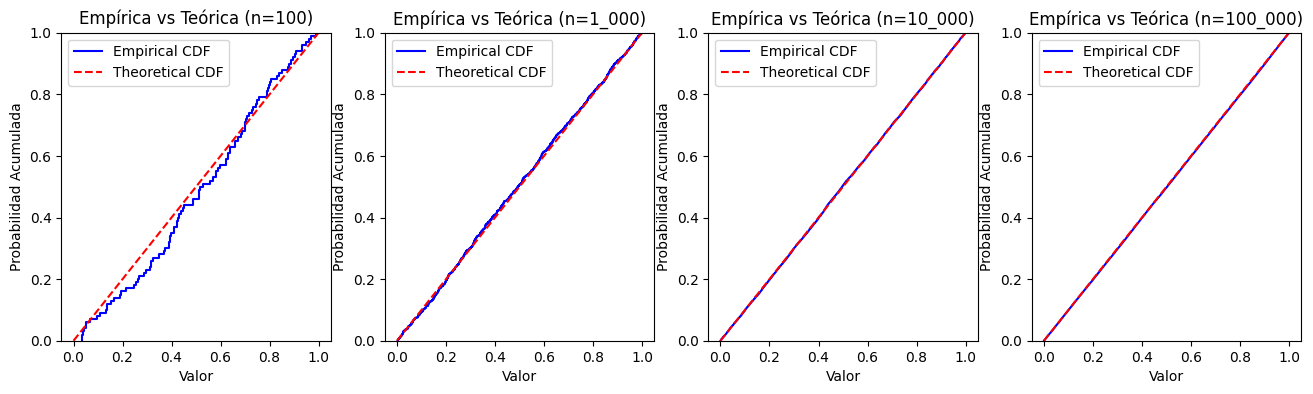

In [35]:
fig, axis = plt.subplots(1, 4, figsize=(16, 4), squeeze=False)

plot_cdf(small_sample, axis[0][0])
plot_cdf(medium_sample, axis[0][1])
plot_cdf(large_sample, axis[0][2])
plot_cdf(very_large_sample, axis[0][3])

# Mostrar el gráfico
plt.show() 

### Test 3 - Cramer Von Mises

In [36]:
# Generamos muestras con nuestro algoritmo
seed_x = int(time.time() * 1_000)
seed_w = int(time.time() * 1_000)
msws = MSWS(seed_x, seed_w)
small_sample = [msws.random() for _ in range(100)]
medium_sample = [msws.random() for _ in range(1_000)]
large_sample = [msws.random() for _ in range(10_000)]
very_large_sample = [msws.random() for _ in range(100_000)]

cramervonmises_test(small_sample)
cramervonmises_test(medium_sample)
cramervonmises_test(large_sample)
cramervonmises_test(very_large_sample)

──────────
Tamaño de la muestra: 100
Estadístico: 0.126
P valor: 0.473
0.473: 0.250, Datos uniformes (No se puede rechazar H0)
0.473: 0.100, Datos uniformes (No se puede rechazar H0)
0.473: 0.050, Datos uniformes (No se puede rechazar H0)
0.473: 0.025, Datos uniformes (No se puede rechazar H0)
0.473: 0.010, Datos uniformes (No se puede rechazar H0)
0.473: 0.005, Datos uniformes (No se puede rechazar H0)
0.473: 0.001, Datos uniformes (No se puede rechazar H0)
──────────
Tamaño de la muestra: 1_000
Estadístico: 0.273
P valor: 0.161
0.161: 0.250, Datos no uniformes (Se rechaza H0)
0.161: 0.100, Datos uniformes (No se puede rechazar H0)
0.161: 0.050, Datos uniformes (No se puede rechazar H0)
0.161: 0.025, Datos uniformes (No se puede rechazar H0)
0.161: 0.010, Datos uniformes (No se puede rechazar H0)
0.161: 0.005, Datos uniformes (No se puede rechazar H0)
0.161: 0.001, Datos uniformes (No se puede rechazar H0)
──────────
Tamaño de la muestra: 10_000
Estadístico: 0.086
P valor: 0.656
0.656

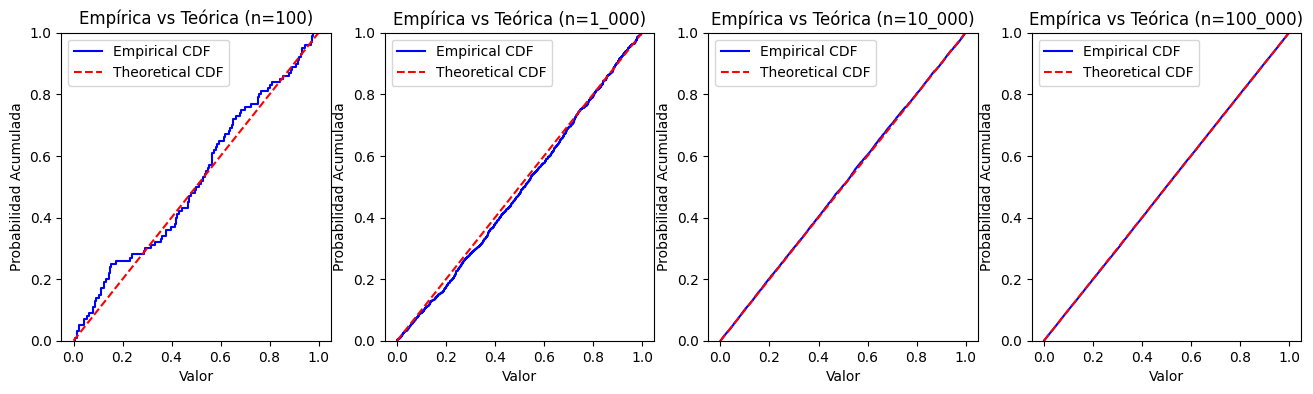

In [37]:
fig, axis = plt.subplots(1, 4, figsize=(16, 4), squeeze=False)

plot_cdf(small_sample, axis[0][0])
plot_cdf(medium_sample, axis[0][1])
plot_cdf(large_sample, axis[0][2])
plot_cdf(very_large_sample, axis[0][3])

# Mostrar el gráfico
plt.show() 

## Ejercicio 3

En base al trabajo:

[Jean Lachaud, Gerard L. Vignoles.
A Brownian motion technique to simulate gasification and its application to C/C composite ablation.
Computational Materials Science, 2008,](https://drive.google.com/file/d/1m4q45aUDdgkzKocnOKwLgYhqGoGycEkP/view)


Se pide:

a) Utilizando el generador implementado en el Ejercicio 1, simular el movimiento browniano propuesto en el
trabajo

b) Realizar una animación del proceso

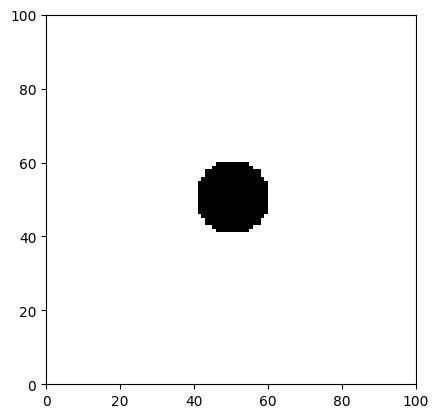

Partícula pegada en (57,44), degradando la superficie y eliminando la partícula...
Partícula pegada en (50,59), degradando la superficie y eliminando la partícula...
Partícula pegada en (51,41), degradando la superficie y eliminando la partícula...
Partícula pegada en (59,52), degradando la superficie y eliminando la partícula...
Partícula pegada en (41,50), degradando la superficie y eliminando la partícula...
Partícula pegada en (58,55), degradando la superficie y eliminando la partícula...
Partícula pegada en (54,41), degradando la superficie y eliminando la partícula...
Partícula pegada en (59,49), degradando la superficie y eliminando la partícula...
Partícula pegada en (59,51), degradando la superficie y eliminando la partícula...
Partícula pegada en (54,59), degradando la superficie y eliminando la partícula...
Partícula pegada en (59,50), degradando la superficie y eliminando la partícula...
Partícula pegada en (50,41), degradando la superficie y eliminando la partícula...
Part

In [38]:
# Parámetros de la simulación
particles = 1000
grid_size = 100
surface_radius = 10
stick_probability = 0.3
steps = 200
retries = 10

simulator = BrownianSimulator2D(steps, particles, grid_size, surface_radius, stick_probability, retries)


fig, ax = plt.subplots()
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)

# Inicialización de los plots
particles_plot, = ax.plot([], [], 'bo', markersize=2)
surface_plot = ax.imshow(simulator.surface_grid, cmap='Greys', origin='lower', extent=[0, grid_size, 0, grid_size])

# Función de inicialización de la animación
def init():
    particles_plot.set_data([], [])
    surface_plot.set_data(simulator.surface_grid)
    return particles_plot, surface_plot

# Función de actualización de la animación
def update(frame):
    simulator.update_positions()
    if len(simulator.particle_positions) > 0:
        particles_plot.set_data(simulator.particle_positions[:, 0], simulator.particle_positions[:, 1])
    else:
        particles_plot.set_data([], [])
    
    surface_plot.set_data(simulator.surface_grid)
    
    return particles_plot, surface_plot


ani = FuncAnimation(fig, update, frames=steps, init_func=init, blit=True, interval=50, repeat=False)


plt.show()
ani.save('brownian.mp4', dpi=150, fps=10,
          extra_args=['-vcodec', 'libx264'],
          savefig_kwargs={'pad_inches':0, 'facecolor':'#457E29'})